In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("pulsar_data_train (1).csv")

In [3]:
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0
...,...,...,...,...,...,...,...,...,...
12523,124.312500,53.179053,-0.012418,-0.556021,7.186455,29.308266,4.531382,21.725143,0.0
12524,115.617188,46.784600,0.218177,0.226757,6.140468,NaN,5.732201,34.357283,0.0
12525,116.031250,43.213846,0.663456,0.433088,0.785117,11.628149,17.055215,312.204325,0.0
12526,135.664062,49.933749,-0.089940,-0.226726,3.859532,21.501505,7.398395,62.334018,0.0


### Renaming columns

In [4]:
df.rename(columns={" Mean of the integrated profile":"pulse_amplitude",
                 " Standard deviation of the integrated profile":"pulse_amplitude_variation",
                 " Excess kurtosis of the integrated profile":"amplitude_distribution_shape",
                 " Skewness of the integrated profile":"amplitude_distribution_asymmetry",
                 " Mean of the DM-SNR curve":"average_signal_strength",
                 " Standard deviation of the DM-SNR curve":"variability_of_snr",
                 " Excess kurtosis of the DM-SNR curve":"distribution_shape_of_snr",
                 " Skewness of the DM-SNR curve":"asymmetry_of_snr_distribution"},inplace=True)

In [5]:
df.head()

,pulse_amplitude,pulse_amplitude_variation,amplitude_distribution_shape,amplitude_distribution_asymmetry,average_signal_strength,variability_of_snr,distribution_shape_of_snr,asymmetry_of_snr_distribution,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [6]:
df.isnull().sum()

pulse_amplitude                        0
pulse_amplitude_variation              0
amplitude_distribution_shape        1735
amplitude_distribution_asymmetry       0
average_signal_strength                0
variability_of_snr                  1178
distribution_shape_of_snr              0
asymmetry_of_snr_distribution        625
target_class                           0
dtype: int64

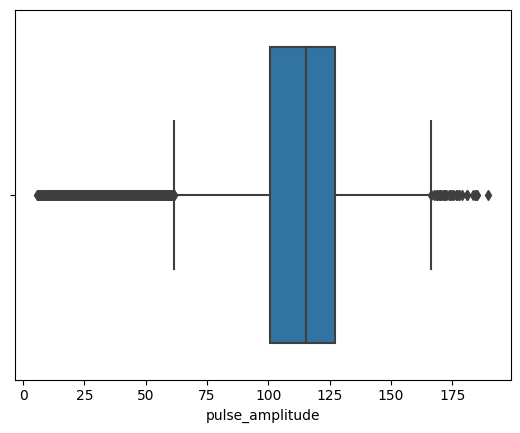

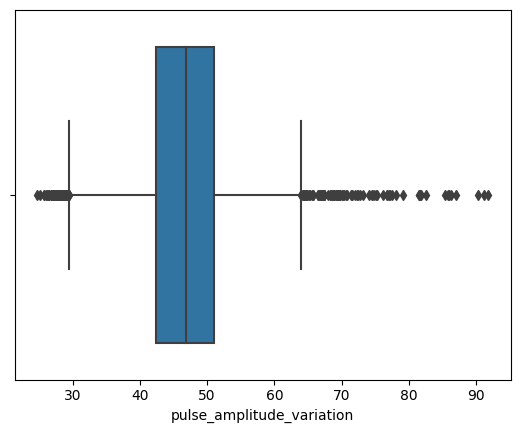

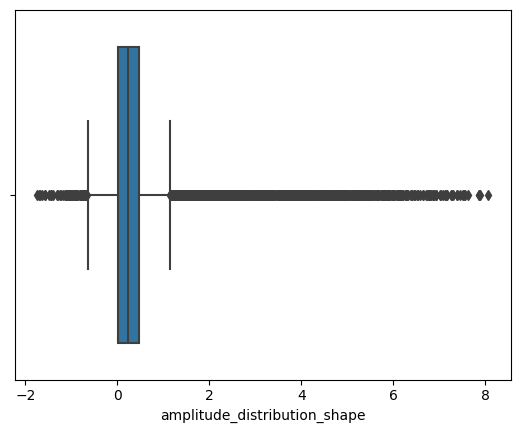

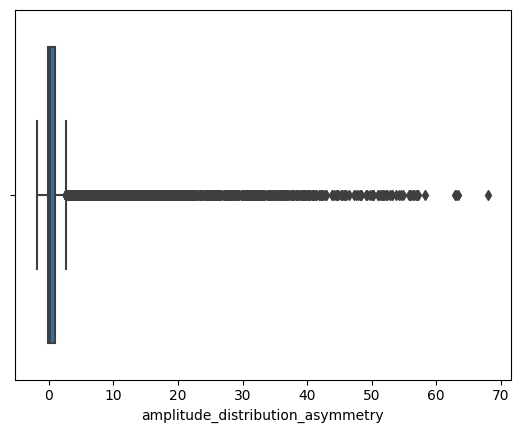

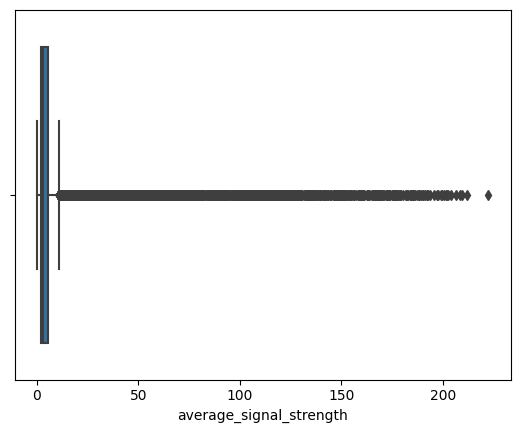

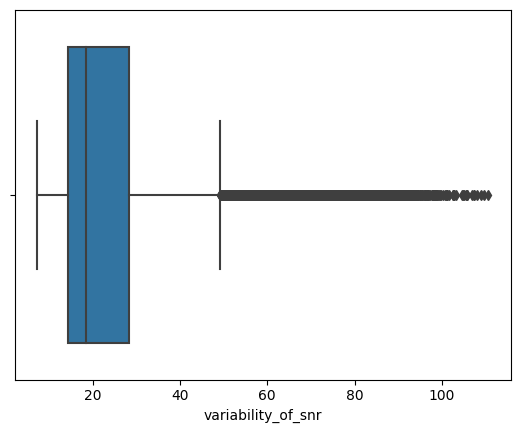

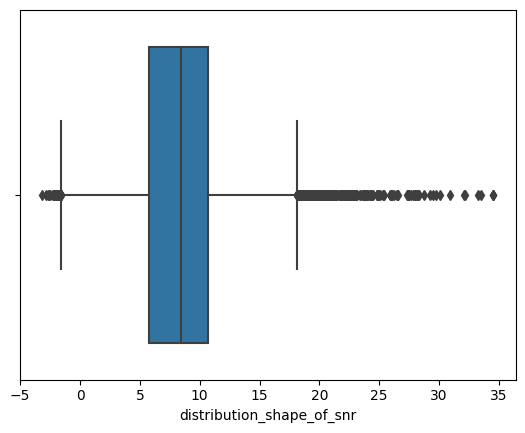

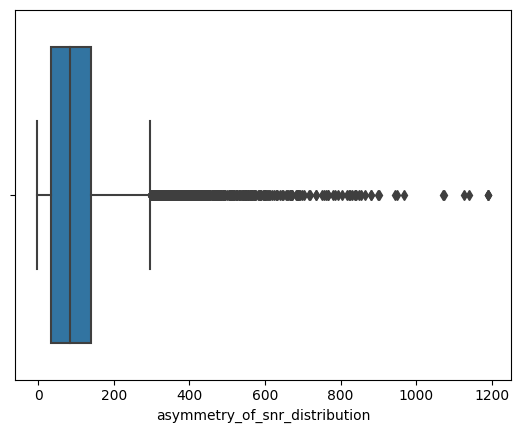

In [7]:
for i in df[['pulse_amplitude',
 'pulse_amplitude_variation',
 'amplitude_distribution_shape',
 'amplitude_distribution_asymmetry',
 'average_signal_strength',
 'variability_of_snr',
 'distribution_shape_of_snr',
 'asymmetry_of_snr_distribution']]:
    sns.boxplot(data = df, x = df[i])
    plt.show()

### In amplitude_distribution_shape ,variability_of_snr,asymmetry_of_snr_distribution columns we have outliers.For this reason we fill this columns with median.

In [8]:
df=df.fillna(df.median())

In [9]:
df.isnull().sum()

pulse_amplitude                     0
pulse_amplitude_variation           0
amplitude_distribution_shape        0
amplitude_distribution_asymmetry    0
average_signal_strength             0
variability_of_snr                  0
distribution_shape_of_snr           0
asymmetry_of_snr_distribution       0
target_class                        0
dtype: int64

### We are creating decision tree model so we do not need to check scale of data.

In [10]:
df.describe()

,pulse_amplitude,pulse_amplitude_variation,amplitude_distribution_shape,amplitude_distribution_asymmetry,average_signal_strength,variability_of_snr,distribution_shape_of_snr,asymmetry_of_snr_distribution,target_class
count,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000,12528.000000
mean,111.041841,46.521437,0.443251,1.778431,12.674758,25.604827,8.333489,104.408308,0.092034
std,25.672828,6.801077,0.992144,6.208450,29.613230,18.809291,4.535783,104.799639,0.289085
min,5.812500,24.772042,-1.738021,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.871094,42.362222,0.057820,-0.188142,1.910535,14.761144,5.803063,38.128424,0.000000
50%,115.183594,46.931022,0.223678,0.203317,2.792642,18.412402,8.451097,83.126301,0.000000
75%,127.109375,50.979103,0.421239,0.932374,5.413253,26.473142,10.727927,135.774973,0.000000
max,189.734375,91.808628,8.069522,68.101622,222.421405,110.642211,34.539844,1191.000837,1.000000


### We have imbalance problem in our dataset.

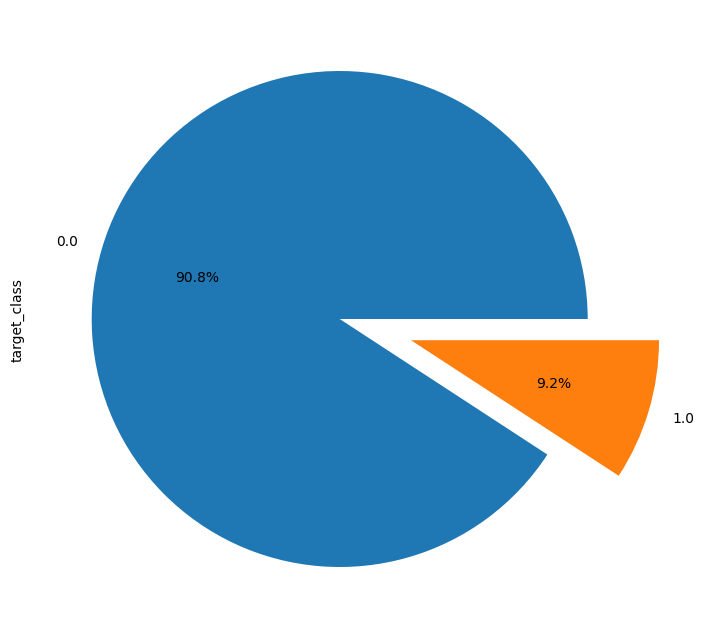

In [11]:
fig,ax=plt.subplots(figsize=(8,10))
explode=[0.0,0.3]
ax=(df["target_class"].value_counts(normalize=True)*100).plot.pie(explode=explode,autopct="%.1f%%")

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree,export_graphviz
from sklearn.metrics import accuracy_score, classification_report

In [13]:
X = df.drop("target_class",axis=1)
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [15]:
feature_importance = model.feature_importances_
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.4f}")

pulse_amplitude: 0.0386
pulse_amplitude_variation: 0.0405
amplitude_distribution_shape: 0.1327
amplitude_distribution_asymmetry: 0.6898
average_signal_strength: 0.0272
variability_of_snr: 0.0235
distribution_shape_of_snr: 0.0260
asymmetry_of_snr_distribution: 0.0217


### We choose amplitude_distribution_asymmetry: 0.6911,amplitude_distribution_shape: 0.1165 for model.

In [16]:
selected_features = ['amplitude_distribution_asymmetry', 'amplitude_distribution_shape']
X = df[selected_features]
y = df['target_class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

DecisionTreeClassifier()

In [17]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)


Accuracy: 0.960095770151636
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.98      0.98      2279
         1.0       0.79      0.76      0.78       227

    accuracy                           0.96      2506
   macro avg       0.88      0.87      0.88      2506
weighted avg       0.96      0.96      0.96      2506



In [18]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

[[2233   46]
 [  54  173]]


(<Figure size 1200x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

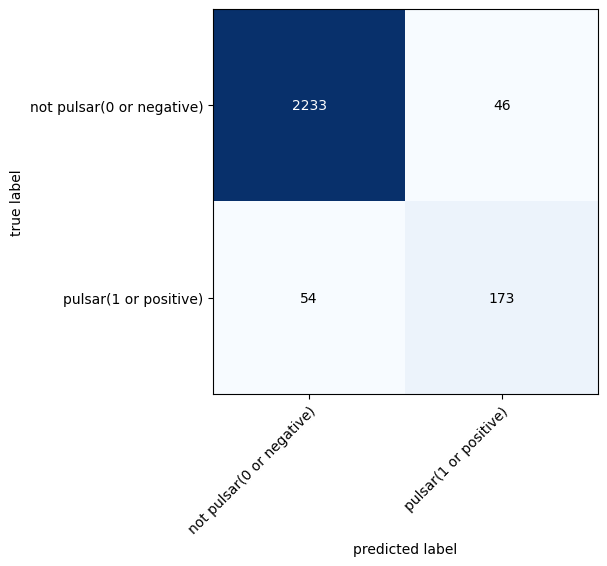

In [19]:
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)
plot_confusion_matrix(conf_matrix,class_names=["not pulsar(0 or negative)","pulsar(1 or positive)"],figsize=(12,5))

### Let's choose best parametres

In [20]:
from sklearn.model_selection import GridSearchCV,StratifiedKFold

In [21]:
cv = StratifiedKFold(n_splits=5,shuffle=True) #I used stratifiedKfold because we have imbalance.
params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,1, 2,3,4, 5, 10],
    'splitter': ['best', 'random']
}


grid_search=GridSearchCV(model,param_grid=params,cv=cv,return_train_score=False)

grid_search.fit(X_train, y_train)
grid_search.cv_results_

{'mean_fit_time': array([0.01859512, 0.00312347, 0.00311956, 0.00250354, 0.00695271,
        0.00129871, 0.00688739, 0.00278282, 0.00971594, 0.00146279,
        0.01110649, 0.00270939, 0.01796846, 0.0040956 , 0.02594304,
        0.00278263, 0.00416059, 0.        , 0.00694757, 0.        ,
        0.00843344, 0.00278325, 0.01386781, 0.00147638, 0.01397476,
        0.00278792, 0.01952705, 0.00336504]),
 'std_fit_time': array([7.97081151e-03, 6.24694824e-03, 6.23912811e-03, 5.00707626e-03,
        8.30416258e-05, 2.59742737e-03, 2.01105437e-04, 3.40825456e-03,
        3.36694037e-03, 2.72222573e-03, 3.37207859e-03, 3.32161213e-03,
        3.35933002e-03, 3.34724094e-03, 2.81963643e-03, 3.40808021e-03,
        3.39715720e-03, 0.00000000e+00, 2.43837757e-05, 0.00000000e+00,
        2.71771060e-03, 3.40885176e-03, 2.54210113e-05, 2.75185804e-03,
        2.38580201e-04, 3.41453037e-03, 2.62365939e-03, 2.66936533e-03]),
 'mean_score_time': array([3.50899696e-03, 3.12504768e-03, 0.00000000e+00, 

### Upper  code not easy to interpret.

In [22]:
results=pd.DataFrame(grid_search.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018595,0.007971,0.003509,0.006067,gini,None,best,"{'criterion': 'gini', 'max_depth': None, 'spli...",0.962594,0.956608,0.962076,0.965569,0.956587,0.960687,0.003545,22
1,0.003123,0.006247,0.003125,0.006250,gini,None,random,"{'criterion': 'gini', 'max_depth': None, 'spli...",0.962594,0.959102,0.960080,0.960080,0.960080,0.960387,0.001166,23
2,0.003120,0.006239,0.000000,0.000000,gini,1,best,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.969576,0.963092,0.963573,0.966567,0.967565,0.966075,0.002444,18
3,0.002504,0.005007,0.003132,0.006265,gini,1,random,"{'criterion': 'gini', 'max_depth': 1, 'splitte...",0.913716,0.940648,0.908683,0.952595,0.908683,0.924865,0.018254,27
4,0.006953,0.000083,0.000000,0.000000,gini,2,best,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.980050,0.972569,0.968563,0.978044,0.975549,0.974955,0.004060,4
5,0.001299,0.002597,0.002865,0.003321,gini,2,random,"{'criterion': 'gini', 'max_depth': 2, 'splitte...",0.968579,0.963591,0.948104,0.927146,0.964072,0.954298,0.015241,25
6,0.006887,0.000201,0.001372,0.002498,gini,3,best,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.979551,0.974564,0.972056,0.977046,0.975549,0.975753,0.002499,3
7,0.002783,0.003408,0.001379,0.002757,gini,3,random,"{'criterion': 'gini', 'max_depth': 3, 'splitte...",0.970574,0.936160,0.960579,0.973553,0.976048,0.963383,0.014591,20
8,0.009716,0.003367,0.000000,0.000000,gini,4,best,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.979551,0.972569,0.969561,0.974052,0.976048,0.974356,0.003351,8
9,0.001463,0.002722,0.001393,0.002786,gini,4,random,"{'criterion': 'gini', 'max_depth': 4, 'splitte...",0.962095,0.967082,0.964072,0.975549,0.965569,0.966873,0.004641,17


In [23]:
results.sort_values(by='rank_test_score', ascending=True)[["param_criterion","param_max_depth","param_splitter","mean_test_score","rank_test_score"]]

,param_criterion,param_max_depth,param_splitter,mean_test_score,rank_test_score
20,entropy,3,best,0.976252,1
22,entropy,4,best,0.976152,2
6,gini,3,best,0.975753,3
4,gini,2,best,0.974955,4
24,entropy,5,best,0.974855,5
13,gini,10,random,0.974755,6
27,entropy,10,random,0.974357,7
8,gini,4,best,0.974356,8
10,gini,5,best,0.973957,9
11,gini,5,random,0.971463,10


In [24]:
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}

<Axes: xlabel='target_class', ylabel='Density'>

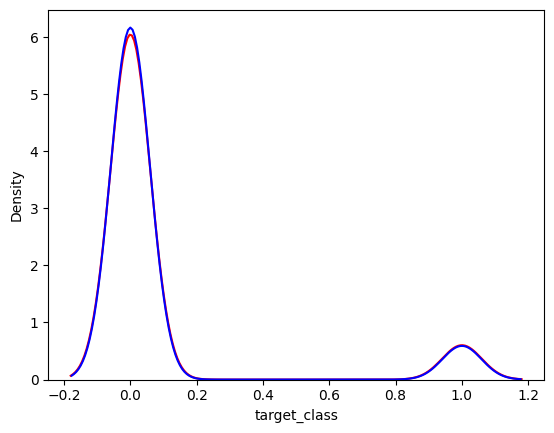

In [25]:
sns.kdeplot(data=y_test,color="red")
sns.kdeplot(data=y_pred,color="blue")

In [28]:
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))

Training set score: 0.9771
Test set score: 0.9789


In [27]:
best_params = {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
model = DecisionTreeClassifier(**best_params)
model.fit(X_train, y_train)


plt.figure(figsize=(12, 8),dpi=1000)
plot_tree(model, feature_names=X.columns, class_names=["Not Pulsar", "Pulsar"], filled=True)
plt.show()

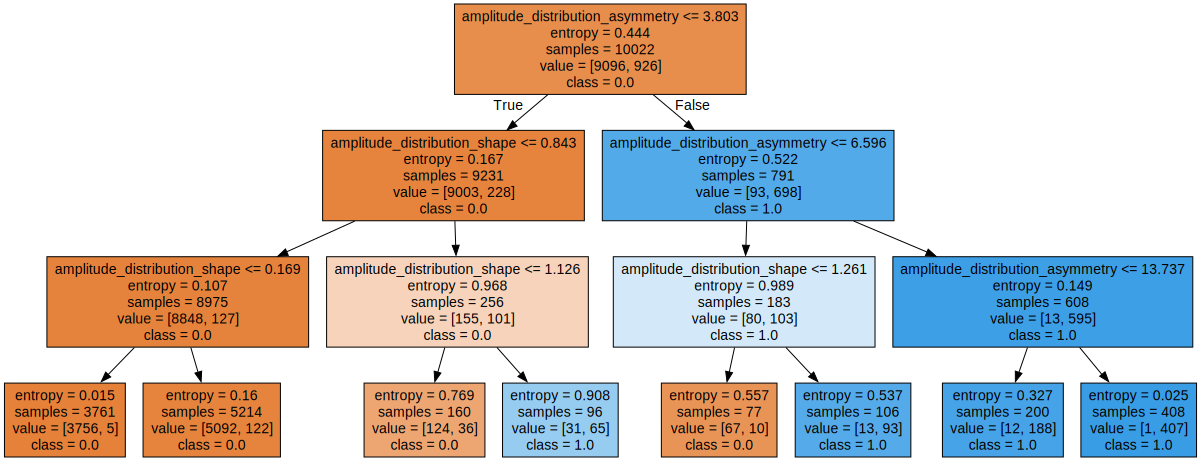

In [28]:
from graphviz import Source
from IPython.display import SVG
class_names = [str(label) for label in y.unique()]

labels = X.columns.astype(str)

graph = Source(export_graphviz(model, feature_names=labels, class_names=class_names, max_depth=5, filled=True))

display(SVG(graph.pipe(format='svg')))

In [29]:
import pickle

with open('decision_tree_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [33]:
df["amplitude_distribution_shape"].min()

-1.738020762

In [34]:
df["amplitude_distribution_asymmetry"].max()

68.10162173